In [2]:
library(dplyr)
library(factoextra)

df_pilot1_2022 <- readRDS(file = "../../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/02_pilot1_2022.rds")

Loading required package: ggplot2
Loading required package: ggplot2


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


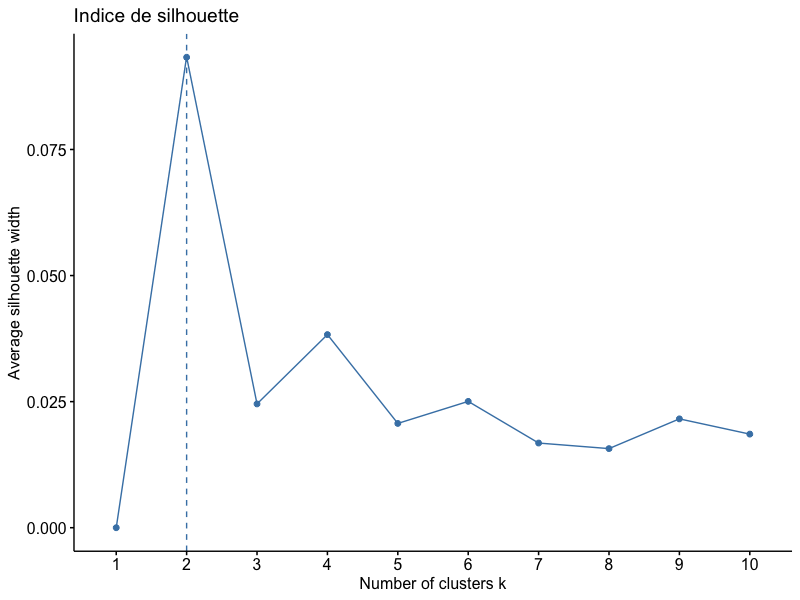

In [3]:
df_pilot1_2022_clust <- df_pilot1_2022 %>% select(-id)
df_scaled <- scale(df_pilot1_2022_clust)

# Récupérer les moyennes et écarts-types
origines <- attr(df_scaled, "scaled:center")  # Moyennes utilisées pour centrer
ecarts_types <- attr(df_scaled, "scaled:scale")  # Écarts-types utilisés pour réduire

# Détermination du nombre optimal de clusters
# Méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss") +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette") +
  ggtitle("Indice de silhouette")

In [4]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 6

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

In [5]:
# Ajouter les clusters au dataframe original
df_pilot1_2022$cluster <- as.factor(kmeans_result$cluster)
df_pilot1_2022_clust$cluster <- as.factor(kmeans_result$cluster)

In [6]:
kmeans_result

K-means clustering with 6 clusters of sizes 502, 389, 181, 124, 139, 165

Cluster means:
       act_Gym      act_Walk
1 -0.009422059  0.0140502166
2  0.024175786 -0.0911948381
3 -0.141758992  0.1545201270
4  0.162590998  0.0760787931
5  0.081883112  0.0008851594
6 -0.063994945 -0.0551719224
       act_Run    act_Yoga    act_Other
1 -0.024375315  0.11122948 -0.115304093
2  0.024439307 -0.14153236  0.140540019
3 -0.161778816 -0.02104371  0.090991980
4  0.273955020  0.12390718 -0.121723603
5  0.009951992  0.11082556 -0.007023165
6 -0.020256159 -0.16812994  0.017048397
     act_None act_Fishing act_Hunting
1 -0.01864941 -0.12511121  -0.1519009
2  0.04380050  0.19134594   0.1925764
3 -0.03246894 -0.24255174  -0.1961643
4 -0.22631642  0.08623728   0.1265203
5  0.14306272 -0.18005996  -0.1580261
6  0.03865460  0.28247898   0.2613630
  act_VisitsMuseumsGaleries
1                0.00138542
2               -0.14069792
3               -0.01867741
4                0.30437415
5                0.270

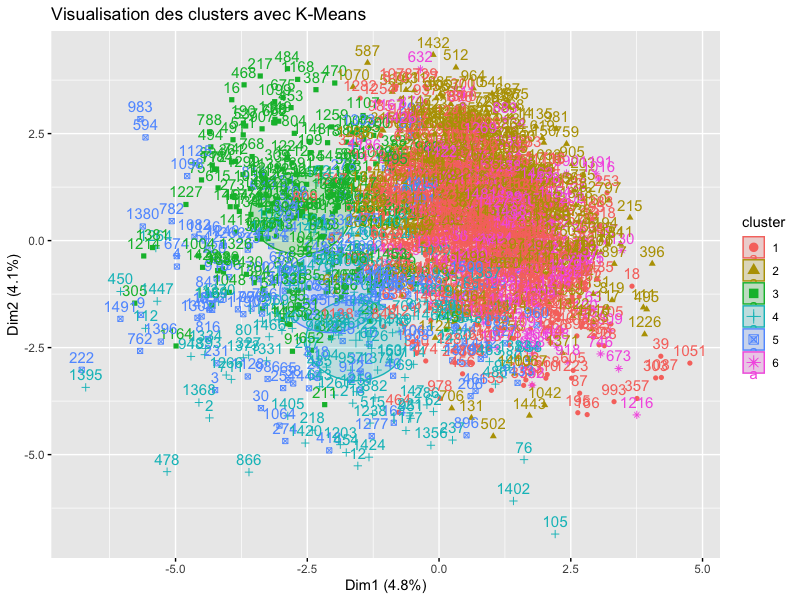

In [7]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

In [8]:
# Effectuewr les moyennes de chaque groupe pour déterminert s'il y a des tendances marquantes
clusters_means <- aggregate(. ~ cluster, data = df_pilot1_2022_clust, function(x) mean(as.numeric(as.character(x)), na.rm = TRUE))

In [9]:
library(dplyr)
library(tidyr)

# Donner des noms aux clusters
df_pilot1_2022 <- df_pilot1_2022 %>%
  mutate(cluster_name = case_when(
    cluster == 1 ~ "Julie",
    cluster == 2 ~ "Jean-Guy",
    cluster == 3 ~ "Mélanie",
    cluster == 4 ~ "Karim",
    cluster == 5 ~ "Charlie",
    cluster == 6 ~ "Jacques"
  ))

# Créer des variables dummy
for (i in 1:6) {
  df_pilot1_2022[[paste0("cluster_", i)]] <- ifelse(df_pilot1_2022$cluster == i, 1, 0)
}


In [10]:
# Sauvegarder les résultats du clustering
saveRDS(origines, file="../../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_scale_origins.rds")
saveRDS(ecarts_types, file="../../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_scale_ecarts_types.rds")
saveRDS(kmeans_result, file = "../../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_kmeans.rds")
saveRDS(df_pilot1_2022, file = "../../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_2022.rds")
write.csv(clusters_means, file = "../../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_clusters_desc.csv", row.names = FALSE)

In [11]:
head(df_pilot1_2022)

  id act_Gym act_Walk act_Run act_Yoga
1  1       0        1       0        0
2  2       0        1       0        0
3  3       0        1       1        0
4  4       0        1       0        0
5  5       1        0       1        0
6  6       0        1       0        0
  act_Other act_None act_Fishing
1         1        0         0.5
2         0        0         0.0
3         0        0         0.0
4         0        0         0.0
5         0        0         0.0
6         0        0         0.0
  act_Hunting act_VisitsMuseumsGaleries
1           0                       0.5
2           0                       0.5
3           0                       1.0
4           0                       0.5
5           0                       0.5
6           0                       0.0
  act_MotorizedOutdoorActivities
1                            0.0
2                            0.0
3                            0.0
4                            0.5
5                            0.5
6                 